
<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Dataset

</p>


### Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

In [1]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests


# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

In [3]:
train_df.sample(5)


,target,id,date,flag,user,text
625485,negative,2230257374,Thu Jun 18 16:51:36 PDT 2009,NO_QUERY,jessdelmedico,@coleybell yeahh dont worry you will! and awww...
1281121,positive,2001704312,Tue Jun 02 01:47:07 PDT 2009,NO_QUERY,AstoriaFromHell,"@Mulciber_ ooc: speaking of smut, I'm off to a..."
371132,negative,2050339888,Fri Jun 05 18:29:44 PDT 2009,NO_QUERY,gennaaaaay,@racheellloviin i missss you too bestfriend ! ...
704745,negative,2256148755,Sat Jun 20 12:20:05 PDT 2009,NO_QUERY,ashiena,http://twitpic.com/7xd9s - Time to make the br...
941681,positive,1794326958,Thu May 14 05:32:54 PDT 2009,NO_QUERY,mikDC,"@ariestotle yeap, twice HAHAHA. Ang hot talag..."



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    DATA EXPLORATION
</p>


C:\Users\ZBook\AppData\Local\Temp\ipykernel_12844\1341521811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=train_df["target"], palette=cols)
C:\Users\ZBook\AppData\Local\Temp\ipykernel_12844\1341521811.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  fg = sns.countplot(x=train_df["target"], palette=cols)


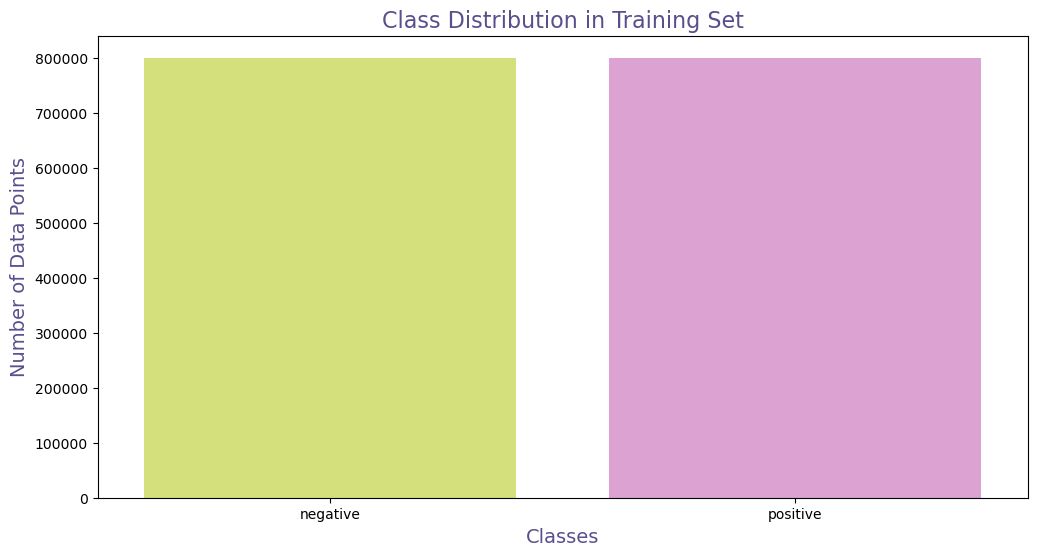

C:\Users\ZBook\AppData\Local\Temp\ipykernel_12844\1341521811.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=test_df["target"], palette=cols)


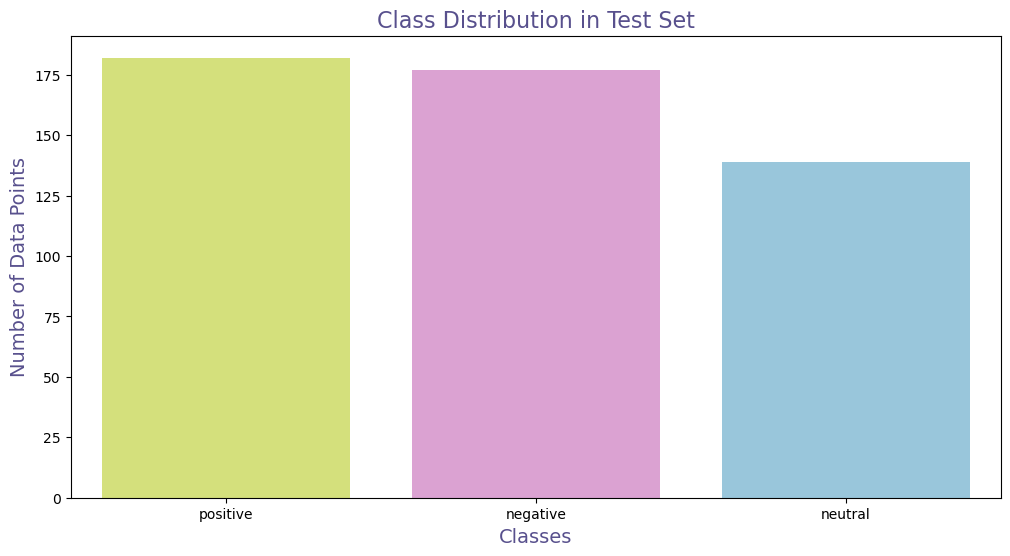

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette colors
cols = ["#E1F16B", "#E598D8", "#8ECAE6"]  

# Countplot for training data
plt.figure(figsize=(12, 6))
fg = sns.countplot(x=train_df["target"], palette=cols)
fg.set_title("Class Distribution in Training Set", color="#58508d", fontsize=16)
fg.set_xlabel("Classes", color="#58508d", fontsize=14)
fg.set_ylabel("Number of Data Points", color="#58508d", fontsize=14)
plt.show()

# Countplot for test data
plt.figure(figsize=(12, 6))
fg = sns.countplot(x=test_df["target"], palette=cols)
fg.set_title("Class Distribution in Test Set", color="#58508d", fontsize=16)
fg.set_xlabel("Classes", color="#58508d", fontsize=14)
fg.set_ylabel("Number of Data Points", color="#58508d", fontsize=14)
plt.show()


<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Tweet Length Histogram
</p>


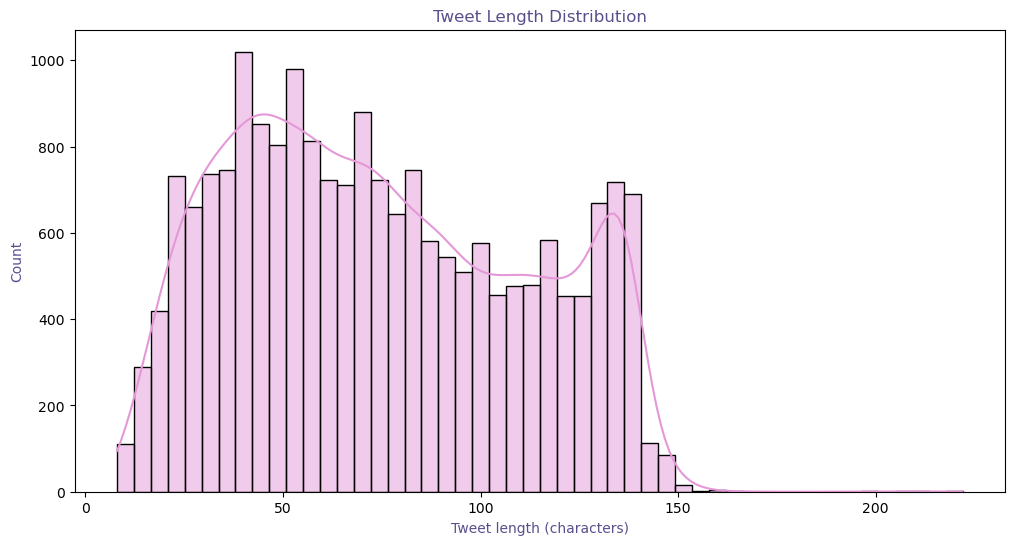

In [5]:
# Histogram of tweet lengths
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(12,6))
sns.histplot(df["text_length"], bins=50, kde=True, color="#E598D8")
plt.title("Tweet Length Distribution", color="#58508d")
plt.xlabel("Tweet length (characters)", color="#58508d")
plt.ylabel("Count", color="#58508d")
plt.show()


<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Top Frequent Tokens
</p>


C:\Users\ZBook\AppData\Local\Temp\ipykernel_12844\3502809821.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=freq_df, palette="viridis")


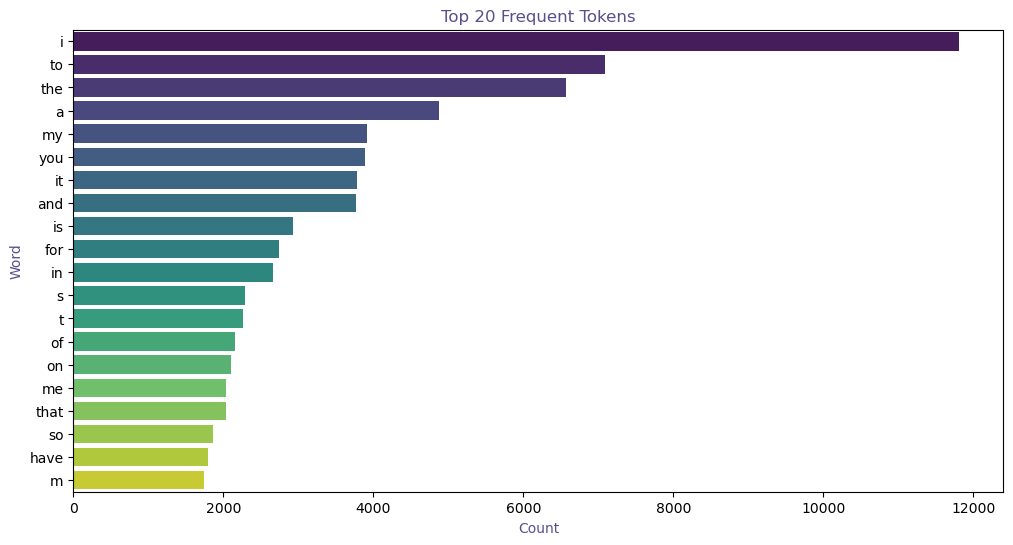

In [6]:
# Get most common words
from collections import Counter
import re

# Tokenize tweets into words
all_words = []
for text in df["text"]:
    tokens = re.findall(r"\b\w+\b", text.lower())
    all_words.extend(tokens)

# Count frequency of top words
word_freq = Counter(all_words).most_common(20)

# Convert to dataframe for plotting
freq_df = pd.DataFrame(word_freq, columns=["word", "count"])

plt.figure(figsize=(12,6))
sns.barplot(x="count", y="word", data=freq_df, palette="viridis")
plt.title("Top 20 Frequent Tokens", color="#58508d")
plt.xlabel("Count", color="#58508d")
plt.ylabel("Word", color="#58508d")
plt.show()


In [8]:
# Display 5 random tweets
print(df[["target", "text"]].sample(5, random_state=42))


         target                                               text
10650  negative  cpr fail day, i turned it off instead of shock...
2041   negative  Laying in the bed because I just found out I'v...
8668   negative  GRUMPY FUCK. i hate when people take there wee...
1114   negative  @lolstephy pls just shutup about splendour n d...
13902  negative  @chrisoldroyd Only UK? What about N. America  ...



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Regex Cleaning
</p>


In [9]:
import re

# Function to clean tweets
def clean_tweet(text):
    # Remove Urls
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions 
    text = re.sub(r"@\w+", "", text)
    # Remove hashtags
    text = re.sub(r"#\w+", "", text)
    # Remove emojis or non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower()
    # Remove spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [10]:
# Apply cleaning on train and test datasets
train_df["clean_text"] = train_df["text"].apply(clean_tweet)
test_df["clean_text"] = test_df["text"].apply(clean_tweet)


In [11]:
# Show before and after cleaning (3 examples)
for i in range(3):
    print("Original:", train_df.loc[i, "text"])
    print("Cleaned :", train_df.loc[i, "clean_text"])
    print("---")


Original: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Cleaned : a that s a bummer you shoulda got david carr of third day to do it d
---
Original: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Cleaned : is upset that he can t update his facebook by texting it and might cry as a result school today also blah
---
Original: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Cleaned : i dived many times for the ball managed to save the rest go out of bounds
---



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Tokenize clean tweets
</p>


In [12]:
import nltk
nltk.download("punkt")


# Tokenize clean tweets
train_df["tokens"] = train_df["clean_text"].apply(nltk.word_tokenize)
test_df["tokens"] = test_df["clean_text"].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# size before clean
vocab_before = set(" ".join(train_df["text"]).split())

print("Vocab size before cleaning:", len(vocab_before))


# size after clean
vocab_after = set(" ".join(train_df["clean_text"]).split())

print("Vocab size after cleaning:", len(vocab_after))


Vocab size before cleaning: 1350598
Vocab size after cleaning: 259068



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    REMOVING STOPWORDS

</p>


In [14]:
from nltk.corpus import stopwords
import string

nltk.download("stopwords")

# function to clean tokens
def clean_tokens(tokens):
    stop_words = set(stopwords.words("english"))
    cleaned = []
    for word in tokens:
        # Remove stopwords
        if word in stop_words:
            continue
        # Remove punctuation
        if word in string.punctuation:
            continue
        # replace Numbers with <NUM>
        if word.isdigit():
            cleaned.append("<NUM>")
            continue
        cleaned.append(word)
    return cleaned




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Apply to train and test
train_df["clean_tokens"] = train_df["tokens"].apply(clean_tokens)
test_df["clean_tokens"] = test_df["tokens"].apply(clean_tokens)

print(train_df[["tokens", "clean_tokens"]].head(3))

                                              tokens  \
0  [a, that, s, a, bummer, you, shoulda, got, dav...   
1  [is, upset, that, he, can, t, update, his, fac...   
2  [i, dived, many, times, for, the, ball, manage...   

                                        clean_tokens  
0    [bummer, shoulda, got, david, carr, third, day]  
1  [upset, update, facebook, texting, might, cry,...  
2  [dived, many, times, ball, managed, save, rest...  




<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    (STAMMING)  VS  (LEMMATIZATION)

</p>


In [16]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download("wordnet")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stamming
train_df["stemmed"] = train_df["clean_tokens"].apply(lambda x: [stemmer.stem(word) for word in x])

# Apply lemmatization
train_df["lemmatized"] = train_df["clean_tokens"].apply(lambda x: [lemmatizer.lemmatize(word, pos='v') for word in x])




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZBook\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Show comparison for first 20 words
sample_words = train_df["clean_tokens"].explode().unique()[:20]
comparison = pd.DataFrame({
    "word": sample_words,
    "stemmed": [stemmer.stem(w) for w in sample_words],
    "lemmatized": [lemmatizer.lemmatize(w, pos="v") for w in sample_words]
})

print(comparison)

        word   stemmed lemmatized
0     bummer    bummer     bummer
1    shoulda   shoulda    shoulda
2        got       got        get
3      david     david      david
4       carr      carr       carr
5      third     third      third
6        day       day        day
7      upset     upset      upset
8     update     updat     update
9   facebook  facebook   facebook
10   texting      text    texting
11     might     might      might
12       cry       cri        cry
13    result    result     result
14    school    school     school
15     today     today      today
16      also      also       also
17      blah      blah       blah
18     dived      dive       dive
19      many      mani       many




<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    POS Tagging (extra features)

</p>


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# function to extract POS
def get_pos_counts(text):
    doc = nlp(" ".join(text))  
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return pd.Series([nouns, verbs, adjs])


In [ ]:

# Apply to train and test
train_df[["noun_count", "verb_count", "adj_count"]] = train_df["clean_tokens"].apply(get_pos_counts)
test_df[["noun_count", "verb_count", "adj_count"]] = test_df["clean_tokens"].apply(get_pos_counts)

print(train_df.head(3))


In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

def add_pos_counts(df):
    # convert tokens to text
    texts = [" ".join(tokens) for tokens in df["clean_tokens"]]
    
    nouns, verbs, adjs = [], [], []
    
    # use nlp.pipe for faster batch processing
    for doc in nlp.pipe(texts, batch_size=1000, n_process=-1):
        nouns.append(sum(1 for token in doc if token.pos_ == "NOUN"))
        verbs.append(sum(1 for token in doc if token.pos_ == "VERB"))
        adjs.append(sum(1 for token in doc if token.pos_ == "ADJ"))
    
    # add results as new columns
    df["noun_count"] = nouns
    df["verb_count"] = verbs
    df["adj_count"] = adjs
    return df

# Apply to train and test
train_df = add_pos_counts(train_df)
test_df = add_pos_counts(test_df)

print(train_df.head(3))


     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   

                                          clean_text  \
0  a that s a bummer you shoulda got david carr o...   
1  is upset that he can t update his facebook by ...   
2  i dived many times for the ball managed to sav...   

                                              tokens  \
0  [a, that, s, a, bummer, you, shoulda, got, dav...   
1  [is, upset, that, he, can, t, update, his, fac...   
2  [i, dived, many, times, for, the, ball, ma


<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Text Representation

</p>


In [ ]:
# check available columns
print(train_df.columns)
print(test_df.columns)

# use clean_tokens for train and test
train_df["Clean_Text"] = train_df["clean_tokens"].apply(lambda x: " ".join(x))
test_df["Clean_Text"] = test_df["clean_tokens"].apply(lambda x: " ".join(x))


Index(['target', 'id', 'date', 'flag', 'user', 'text', 'clean_text', 'tokens',
       'clean_tokens', 'stemmed', 'lemmatized', 'noun_count', 'verb_count',
       'adj_count', 'Clean_Text'],
      dtype='object')
Index(['target', 'id', 'date', 'flag', 'user', 'text', 'clean_text', 'tokens',
       'clean_tokens', 'noun_count', 'verb_count', 'adj_count'],
      dtype='object')


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag_of-Words
bow_vectorizer = CountVectorizer(max_features=5000)
bow_features = bow_vectorizer.fit_transform(train_df["Clean_Text"])

print("BoW -> vocab size:", len(bow_vectorizer.vocabulary_))
print("BoW -> dimension:", bow_features.shape)


BoW -> vocab size: 5000
BoW -> dimension: (1600000, 5000)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF/IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(train_df["Clean_Text"])

print("TF-IDF -> vocab size:", len(tfidf_vectorizer.vocabulary_))
print("TF-IDF -> dimension:", tfidf_features.shape)


TF-IDF -> vocab size: 5000
TF-IDF -> dimension: (1600000, 5000)


In [27]:
import gensim.downloader as api

# load embedding
w2v = api.load("glove-wiki-gigaword-100")  

def avg_w2v(tokens, model, k=100):
    vecs = [model[w] for w in tokens if w in model]
    return np.mean(vecs, axis=0) if len(vecs) > 0 else np.zeros(k)

# apply to train & test
train_w2v = np.vstack(train_df["clean_tokens"].apply(lambda x: avg_w2v(x, w2v)))
test_w2v  = np.vstack(test_df["clean_tokens"].apply(lambda x: avg_w2v(x, w2v)))

print("Word2Vec -> dimension:", train_w2v.shape)


[==================================================] 100.0% 128.1/128.1MB downloaded
Word2Vec -> dimension: (1600000, 100)


In [28]:
# Summary table
results = pd.DataFrame({
    "Representation": ["Bag-of-Words", "TF-IDF", "Word2Vec"],
    "Vocab Size": [
        len(bow_vectorizer.vocabulary_),
        len(tfidf_vectorizer.vocabulary_),
        "N/A (pretrained)"
    ],
    "Dimension": [
        bow_features.shape,
        tfidf_features.shape,
        train_w2v.shape
    ]
})

print(results)


  Representation        Vocab Size        Dimension
0   Bag-of-Words              5000  (1600000, 5000)
1         TF-IDF              5000  (1600000, 5000)
2       Word2Vec  N/A (pretrained)   (1600000, 100)



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    MODEL BUILDING

</p>


In [29]:
# first (balanced) and filter test set (remove neutral)
from sklearn.model_selection import train_test_split
n_class = 10000

train_subset = (
    train_df.groupby("target")
    .apply(lambda g: g.sample(n=min(len(g), n_class), random_state=42))
    .reset_index(drop=True)
)

#  test  withoutt 'neutral'
test_filtered = test_df[test_df["target"] != "neutral"].reset_index(drop=True)

X_train = train_subset["Clean_Text"]
y_train = train_subset["target"]

X_test = test_filtered["Clean_Text"]
y_test = test_filtered["target"]

print("Train subset:", train_subset.shape)
print("Test filtered:", test_filtered.shape)


Train subset: (20000, 15)
Test filtered: (359, 13)


C:\Users\ZBook\AppData\Local\Temp\ipykernel_12844\2766025197.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(len(g), n_class), random_state=42))


In [ ]:
# second: multiple pipelines for BoW and TF-IDF
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline


vectorizers = {"BoW": CountVectorizer(max_features=5000),"TFIDF": TfidfVectorizer(max_features=5000)}

classifiers = {"MultinomialNB": MultinomialNB(), "LogisticRegression": LogisticRegression(max_iter=1000),  "LinearSVC": LinearSVC(max_iter=10000)}

results = []

for vec_name, vec in vectorizers.items():
    for clf_name, clf in classifiers.items():
        pipe = Pipeline([
            ("vect", vec),
            ("clf", clf)
        ])
        print(f"Training: {vec_name} + {clf_name} ...")
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds, average="weighted")
        prec = precision_score(y_test, preds, average="weighted")
        rec = recall_score(y_test, preds, average="weighted")
        results.append({
            "Representation": vec_name,
            "Classifier": clf_name,
            "Accuracy": acc,
            "F1_weighted": f1,
            "Precision": prec,
            "Recall": rec
        })

In [33]:
# convert 2 DataFrame
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="F1_weighted", ascending=False).reset_index(drop=True)
print(results_df)


  Representation          Classifier  Accuracy  F1_weighted  Precision  \
0            BoW       MultinomialNB  0.799443     0.799312   0.800972   
1          TFIDF       MultinomialNB  0.791086     0.790918   0.792830   
2          TFIDF  LogisticRegression  0.779944     0.779729   0.780497   
3            BoW  LogisticRegression  0.757660     0.757615   0.757676   
4          TFIDF           LinearSVC  0.754875     0.754886   0.754944   
5            BoW           LinearSVC  0.735376     0.735273   0.735456   

     Recall  
0  0.799443  
1  0.791086  
2  0.779944  
3  0.757660  
4  0.754875  
5  0.735376  


In [35]:
# thierd: Word2Vec>> load pretrained embeddings
import gensim.downloader as api
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator

w2v = api.load("glove-wiki-gigaword-100")   

class MeanEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
        self.dim = model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mats = []
        for item in X:
            if isinstance(item, list):
                words = item
            else:
                words = str(item).split()
            vecs = [self.model[w] for w in words if w in self.model]
            if len(vecs) > 0:
                mats.append(np.mean(vecs, axis=0))
            else:
                mats.append(np.zeros(self.dim))
        return np.vstack(mats)



In [36]:
# prepare token-input for transformer
X_train_tokens = train_subset["clean_tokens"].tolist()
X_test_tokens  = test_filtered["clean_tokens"].tolist()

# classifiers to try with W2V 
w2v_classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(max_iter=10000)
}

w2v_results = []
w2v_transformer = MeanEmbeddingTransformer(w2v)

for clf_name, clf in w2v_classifiers.items():
    pipe = Pipeline([
        ("w2v", w2v_transformer),
        ("clf", clf)
    ])
    print(f"Training: Word2Vec + {clf_name} ...")
    pipe.fit(X_train_tokens, y_train)
    preds = pipe.predict(X_test_tokens)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")
    prec = precision_score(y_test, preds, average="weighted")
    rec = recall_score(y_test, preds, average="weighted")
    w2v_results.append({
        "Representation": "Word2Vec",
        "Classifier": clf_name,
        "Accuracy": acc,
        "F1_weighted": f1,
        "Precision": prec,
        "Recall": rec
    })



Training: Word2Vec + LogisticRegression ...
Training: Word2Vec + LinearSVC ...


In [37]:
# convert to DataFrame
w2v_results_df = pd.DataFrame(w2v_results).sort_values(by="F1_weighted", ascending=False).reset_index(drop=True)
print(w2v_results_df)

  Representation          Classifier  Accuracy  F1_weighted  Precision  \
0       Word2Vec  LogisticRegression   0.75766     0.757329   0.758425   
1       Word2Vec           LinearSVC   0.75766     0.757329   0.758425   

    Recall  
0  0.75766  
1  0.75766  



<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    EVALUATING MODELS

</p>


In [57]:
# four: comparison table
all_results = pd.concat([results_df, w2v_results_df], ignore_index=True)

all_results[["Accuracy","F1_weighted","Precision","Recall"]] = all_results[["Accuracy","F1_weighted","Precision","Recall"]].round(4)
display(all_results.sort_values(by="F1_weighted", ascending=False).reset_index(drop=True))


,Representation,Classifier,Accuracy,F1_weighted,Precision,Recall
0,BoW,MultinomialNB,0.7994,0.7993,0.8010,0.7994
1,TFIDF,MultinomialNB,0.7911,0.7909,0.7928,0.7911
2,TFIDF,LogisticRegression,0.7799,0.7797,0.7805,0.7799
3,BoW,LogisticRegression,0.7577,0.7576,0.7577,0.7577
4,Word2Vec,LogisticRegression,0.7577,0.7573,0.7584,0.7577
5,Word2Vec,LinearSVC,0.7577,0.7573,0.7584,0.7577
6,TFIDF,LinearSVC,0.7549,0.7549,0.7549,0.7549
7,BoW,LinearSVC,0.7354,0.7353,0.7355,0.7354


****Note>>****  **MultinomialNB only works with count-based features (BoW/TF–IDF), not with dense embeddings like Word2Vec. For Word2Vec we used Logistic Regression and Linear SVM instead.**


In [55]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#5C9095", "#2B3F50", "#604086"])  
all_results.style.background_gradient(cmap=cmap)


,Representation,Classifier,Accuracy,F1_weighted,Precision,Recall
0,BoW,MultinomialNB,0.799400,0.799300,0.801000,0.799400
1,TFIDF,MultinomialNB,0.791100,0.790900,0.792800,0.791100
2,TFIDF,LogisticRegression,0.779900,0.779700,0.780500,0.779900
3,BoW,LogisticRegression,0.757700,0.757600,0.757700,0.757700
4,TFIDF,LinearSVC,0.754900,0.754900,0.754900,0.754900
5,BoW,LinearSVC,0.735400,0.735300,0.735500,0.735400
6,Word2Vec,LogisticRegression,0.757700,0.757300,0.758400,0.757700
7,Word2Vec,LinearSVC,0.757700,0.757300,0.758400,0.757700


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 1) build best model pipeline (BoW + MultinomialNB)
best_pipe = Pipeline([
    ("vect", CountVectorizer(max_features=5000)),
    ("clf", MultinomialNB())
])

# 2) fit best model on full training data
best_pipe.fit(X_train, y_train)



Pipeline(steps=[('vect', CountVectorizer(max_features=5000)),
                ('clf', MultinomialNB())])

              precision    recall  f1-score   support

    negative     0.7778    0.8305    0.8033       177
    positive     0.8235    0.7692    0.7955       182

    accuracy                         0.7994       359
   macro avg     0.8007    0.7999    0.7994       359
weighted avg     0.8010    0.7994    0.7993       359



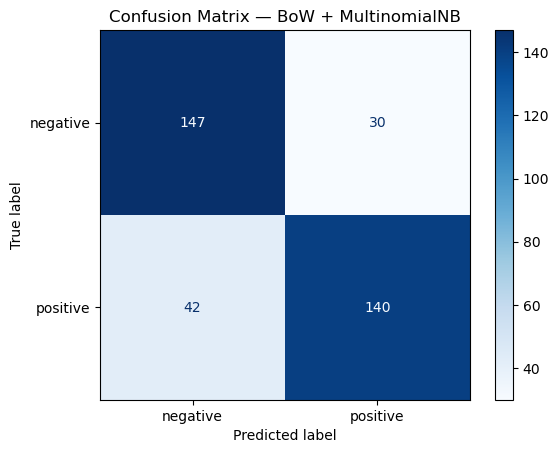

In [59]:
# 3) Evaluation
y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=best_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipe.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix — BoW + MultinomialNB")
plt.show()

In [60]:
# 4) Wrong predictions analysis
mis_idx = np.where(y_pred != y_test)[0]
for i in mis_idx[:10]:
    print(f"Index: {i}")
    print("Original:", test_filtered.loc[i, "text"])
    print("Cleaned :", test_filtered.loc[i, "Clean_Text"])
    print("True    :", y_test.iloc[i])
    print("Pred    :", y_pred[i])
    print("-"*80)

Index: 3
Original: @kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)
Cleaned : love kindle mine months never looked back new big one huge need remorse
True    : positive
Pred    : negative
--------------------------------------------------------------------------------
Index: 4
Original: @mikefish  Fair enough. But i have the Kindle2 and I think it's perfect  :)
Cleaned : fair enough kindle think perfect
True    : positive
Pred    : negative
--------------------------------------------------------------------------------
Index: 14
Original: #lebron best athlete of our generation, if not all time (basketball related) I don't want to get into inter-sport debates about   __1/2
Cleaned : best athlete generation time basketball related want get inter sport debates
True    : positive
Pred    : negative
--------------------------------------------------------------------------------
Index: 18
Original: 

## Discussion of Common Issues

Several classification errors were observed, often due to the following factors:

### 1. Positive Tweets Misclassified as Negative
Some tweets containing clearly positive words like **“love”**, **“perfect”**, or **“fun”** were misclassified as negative. This often happens when:
- These words appear in **neutral or ambiguous contexts** (e.g., references to *Kindle*, *apps*, or *sports*).
- The model does not **strongly associate** such terms with positivity in the training data.

### 2. Short Texts
Examples like:
- *“lebron IS THE BOSS”*
- *“itchy maybe later lol”*

These are too short or lack sufficient context for the model to accurately infer sentiment. The limited word count restricts the feature space for learning meaningful patterns.

### 3. Sarcasm or Irony
Tweets that include sarcasm or irony are particularly challenging. For example:
- *“Oh great, another Monday *

Bag-of-words and traditional word embeddings often fail to capture tone or implied meaning, which leads to incorrect sentiment predictions.

### 4. Domain-Specific Vocabulary
Words and entities like:
- *“NBA”*
- *“Kindle”*
- *“Visa office”*

These may not appear frequently (or at all) in the training set. As a result, the model lacks context to understand their typical sentiment association, leading to misclassification.

---

> **Conclusion**: These issues highlight the limitations of shallow text representations like bag-of-words or average word embeddings, especially in handling **context, tone, and domain-specific content**. More advanced models (e.g., transformers or fine-tuned contextual embeddings) may help mitigate these problems.




<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Save Model Pipeline

</p>


In [61]:
import joblib

# Save the pipeline
joblib.dump(best_pipe, "sentiment_model.pkl")
print(" Model saved!")


 Model saved!


In [ ]:
# Load and test or deployed the saved model 
'''loaded_model = joblib.load("sentiment_model.pkl")'''




<p style="font-family: 'Times New Roman'; color: pink; font-size: 250%; text-align: center; border-radius: 20px 60px;">
    Deployment Step

</p>

### you will find python file "app.py" about this section!

 ***Good luck*** 